# Aprendizaje automático explicable en el pronóstico y la predicción del cáncer



#### Arrabali Cañete, Carmen Lucía
###### Julio 2024

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importar librerías necesarias
Para este proyecto se va a hacer uso de las siguientes librerías:


*   *NumPy (Numeral Python)*: se trata de una biblioteca fundamental para la computación numérica en Python. Proporciona un conjunto de funciones y herramientas para trabajar con matrices multidimensionales y realizar operaciones matemáticas eficientes en ellas. NumPy es ampliamente utilizado en el procesamiento de datos y en la implementación de algoritmos de aprendizaje automático debido a su eficiencia y facilidad de uso. Además, es útil para poder crear vectores y matrices de gran tamaño multidimensional, junto con una gran colección de funciones matemáticas de alto nivel.
*   *Pandas*: es una biblioteca que ofrece estructura de datos y herramientas para análisis de datos. Pandas es ampliamente utilizado para cargar, limpiar, transformar y analizar datos en el contexto de la ciencia de datos y el aprendizaje automático.
*   *Matplotlib*: se trata de biblioteca muy útil para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas o en arrays. Es una herramienta fundamental para la visualización de datos en Python y se utiliza comúnmente junto con Pandas y NumPy.
*   *Seaborn*: biblioteca de visualización de datos basada en Matplotlib. Ofrece una interfaz de alto nivel para crear gráficos estadísticos atractivos y informativos. Es muy útil para explorar datos y visualizar relaciones entre variables.
* *Scikit-learn (Sklearn)*: es una biblioteca de aprendizaje automático en Python que proporciona una amplia gama de algoritmos de aprendizaje supervisado y no supervisado, así como herramientas para la evaluación de modelos, preprocesamiento de datos, selección de características y más.





In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=99817e8400d134aa5518663b5a799674d24e998d103e3ca39b5655713afa65eb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [6]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00


## 2. Importar datos y formateo

Estos datos se han obtenido de [la base de datos de cáncer de pulmón](https://data.world/cancerdatahp/lung-cancer-data). Se trata de un dataset que contiene información de pacientes que tienen cáncer de pulmón.

In [7]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/cancer_datasets.csv")

Para poder visualizar los datos, se aplica la función `head()` al dataset. Por otro lado, se aplica también la función `info()` para obtener la información de los datos que incluye el archivo, incluyendo las columnas, el número de datos no nulos que hay y el tipo de datos que es.


In [8]:
df.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

Los datos que se encuentran dentro del Dataset son los siguientes:

* *Age:* Edad del paciente en años.
* *Gender:*	El género del paciente. 1 = Hombre; 2 = Mujer.
* *Air pollution:*	Nivel de exposición a la contaminación atmosférica del paciente.
* *Alcohol use:* El nivel de consumo de alcohol del paciente.
* *Dust allergy:*	El nivel de alergia al polvo del paciente.
* *Occupational hazards:* El nivel de riesgos laborales del paciente.
* *Genetic risk:* El nivel de riesgo genético del paciente.
* *Chronic lung disease:* El nivel de enfermedad pulmonar crónica del paciente.
* *Balanced diet:*	El nivel de dieta equilibrada del paciente.
* *Obesity:* El nivel de obesidad del paciente.
* *Smoking:* Nivel de tabaquismo del paciente.
* *Passive smoker:* El nivel de fumador pasivo del paciente.
* *Chest pain:* Nivel de dolor torácico del paciente.
* *Coughing of blood:*	Nivel de tos con sangre del paciente.
* *Fatigue*:	El nivel de fatiga del paciente.
* *Weight loss:* Nivel de pérdida de peso del paciente.
* *Shortness of breath:*	El nivel de dificultad respiratoria del paciente.
* *Wheezing:* El nivel de sibilancias del paciente.
* *Swallowing difficulty:* Nivel de dificultad para tragar del paciente.
* *Clubbing of finger nails:* El nivel de palidez de las uñas de las manos del paciente.
* *Frequent cold:* Nivel de resfriado frecuente del paciente.
* *Dry cough:* Nivel de tos seca del paciente.
* *Snoring:* Nivel de ronquidos del paciente cuando está dormido.
* *Level:* La gravedad del cáncer que tiene el paciente, puede ser alto, medio o bajo.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## 3. Preprocesado de los datos



Por un lado, se busca si hay algun dato nulo para poder hacer un preprocesado de datos y así poder hacer uso únicamente de datos válidos. Para ello, se aplica la función `isnull()` y `sum()` para hacer el recuento.

In [10]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

En este caso, de todas las categorías de datos, ninguna de ellas contiene datos nulos.

Continuando con el análisis previo de los datos, se utiliza la función `drop()` para poder eliminar aquellas columnas que no son relevantes para el análisis de los datos, como puede ser el *index* y el *Patient ID*.

In [11]:
df.drop(["index", "Patient Id"], axis = 1, inplace = True)
df

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 24 columns]

Además, se utiliza la función `rename()` para modificar el nombre de las columnas, que sean todos en minúscula y, además, sustituir el espacio por un guión bajo y que así quede estandarizado.

In [12]:
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)
df

age  gender  air_pollution  alcohol_use  dust_allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     obesity  ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     dry_cough  snoring   level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 24 columns]

También se hace uso de la función `describe()` que genera estadísticas descriptivas de los mismos, que incluye la media, la mediana, entre otros valores estadísticos.

In [13]:
round(df.describe(), 2)

age   gender  air_pollution  alcohol_use  dust_allergy  \
count  1000.00  1000.00        1000.00      1000.00       1000.00   
mean     37.17     1.40           3.84         4.56          5.16   
std      12.01     0.49           2.03         2.62          1.98   
min      14.00     1.00           1.00         1.00          1.00   
25%      27.75     1.00           2.00         2.00          4.00   
50%      36.00     1.00           3.00         5.00          6.00   
75%      45.00     2.00           6.00         7.00          7.00   
max      73.00     2.00           8.00         8.00          8.00   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
count               1000.00       1000.00               1000.00   
mean                   4.84          4.58                  4.38   
std                    2.11          2.13                  1.85   
min                    1.00          1.00                  1.00   
25%                    3.00          2.00                  3.00   
50%                    5.00          5.00                  4.00   
75%                    7.00          7.00                  6.00   
max                    8.00          7.00                  7.00   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss  \
count        1000.00  1000.00  ...            1000.00  1000.00      1000.00   
mean            4.49     4.46  ...               4.86     3.86         3.86   
std             2.14     2.12  ...               2.43     2.24         2.21   
min             1.00     1.00  ...               1.00     1.00         1.00   
25%             2.00     3.00  ...               3.00     2.00         2.00   
50%             4.00     4.00  ...               4.00     3.00         3.00   
75%             7.00     7.00  ...               7.00     5.00         6.00   
max             7.00     7.00  ...               9.00     9.00         8.00   

       shortness_of_breath  wheezing  swallowing_difficulty  \
count              1000.00   1000.00                1000.00   
mean                  4.24      3.78                   3.75   
std                   2.29      2.04                   2.27   
min                   1.00      1.00                   1.00   
25%                   2.00      2.00                   2.00   
50%                   4.00      4.00                   4.00   
75%                   6.00      5.00                   5.00   
max                   9.00      8.00                   8.00   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
count                   1000.00        1000.00    1000.00  1000.00  
mean                       3.92           3.54       3.85     2.93  
std                        2.39           1.83       2.04     1.47  
min                        1.00           1.00       1.00     1.00  
25%                        2.00           2.00       2.00     2.00  
50%                        4.00           3.00       4.00     3.00  
75%                        5.00           5.00       6.00     4.00  
max                        9.00           7.00       7.00     7.00  

[8 rows x 23 columns]

Mientras que la gran mayoría de datos están en el rango de 1 a 9, la edad está comprendida entre 14 y 73, valores que se estandarizarán más adelante.

Adicional a lo anterior, se quiere visualizar la cantidad que hay de pacientes por nivel, en este caso *low*, *medium* y *high*.

<ipython-input-14-64c2a0c8adb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data = sns.countplot(x=df.level, palette = "husl")


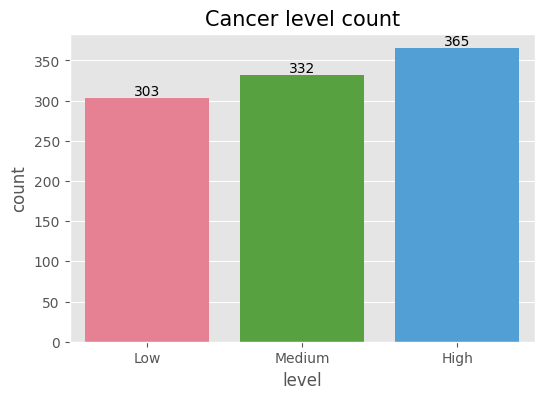

In [14]:
plt.figure(figsize = (6,4))
data = sns.countplot(x=df.level, palette = "husl")
for bars in data.containers:
    data.bar_label(bars)
plt.title("Cancer level count", fontsize = 15);

En la imagen anterior se pueden observar 3 histogramas que comparan la cantidad de los pacientes con respecto al nivel de cáncer que padece.
Adicional a eso, hay que estandarizar los datos de la columna *level* de manera que queden en formato `integer`.

In [15]:
print('Nivel de cáncer: ', df['level'].unique())

df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Nivel de cáncer: ', df['level'].unique())

print('\nColumnas en el conjunto de datos: \n', df.columns)

Nivel de cáncer:  ['Low' 'Medium' 'High']
Nivel de cáncer:  [0 1 2]

Columnas en el conjunto de datos: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')


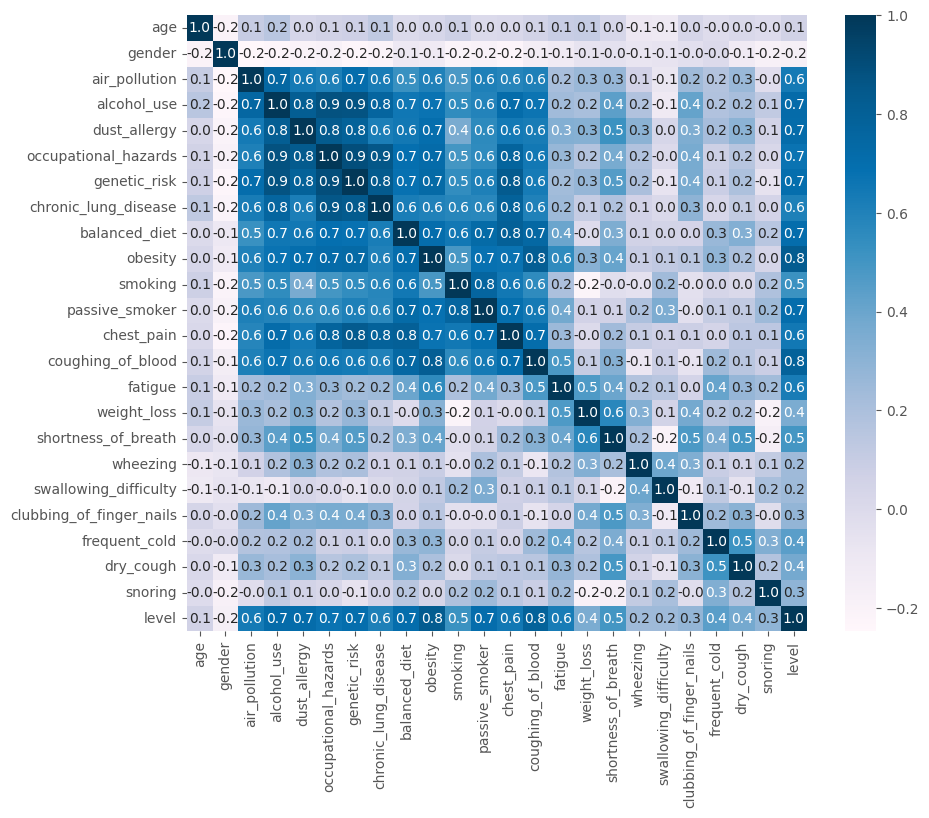

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu, fmt=".1f")
plt.show()

Como se puede observar en el *heatmap*, hay ciertas condiciones médicas que tienen mayor probabilidad de tener cáncer de pulmón y otras que no son tan relevantes. En el caso de aquellas que si son mucho más importantes a la hora de decidir si ese paciente tiene cáncer, habría que tener más en cuenta la contaminación del aire, el uso de alcohol, riesgo genético de padecer cáncer o si tiene una enfermedad crónica de pulmón, que la edad o el género no es tan relevante.

A continuación, se prepararán los datos para poder hacer un entrenamiento de los mismos. De manera que solo se analizan los datos más relevantes para la investigación, como puede ser el uso de alcohol, el riesgo genético o la enfermedad crónica de pulmón.

In [17]:
selected_columns = ['air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood']

prepared_data = df[selected_columns]
prepared_data = prepared_data.dropna(axis=0)
round(prepared_data.describe(include='all'), 2)

air_pollution  alcohol_use  dust_allergy  occupational_hazards  \
count        1000.00      1000.00       1000.00               1000.00   
mean            3.84         4.56          5.16                  4.84   
std             2.03         2.62          1.98                  2.11   
min             1.00         1.00          1.00                  1.00   
25%             2.00         2.00          4.00                  3.00   
50%             3.00         5.00          6.00                  5.00   
75%             6.00         7.00          7.00                  7.00   
max             8.00         8.00          8.00                  8.00   

       genetic_risk  chronic_lung_disease  balanced_diet  obesity  smoking  \
count       1000.00               1000.00        1000.00  1000.00  1000.00   
mean           4.58                  4.38           4.49     4.46     3.95   
std            2.13                  1.85           2.14     2.12     2.50   
min            1.00                  1.00           1.00     1.00     1.00   
25%            2.00                  3.00           2.00     3.00     2.00   
50%            5.00                  4.00           4.00     4.00     3.00   
75%            7.00                  6.00           7.00     7.00     7.00   
max            7.00                  7.00           7.00     7.00     8.00   

       passive_smoker  chest_pain  coughing_of_blood  
count         1000.00     1000.00            1000.00  
mean             4.20        4.44               4.86  
std              2.31        2.28               2.43  
min              1.00        1.00               1.00  
25%              2.00        2.00               3.00  
50%              4.00        4.00               4.00  
75%              7.00        7.00               7.00  
max              8.00        9.00               9.00

## 4. Entrenamiento y prueba. División de los datos

In [18]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(prepared_data)
y = df.level

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=1)

### Función para medir el rendimiento
Se va a utilizar para poder visualizar el rendimiento de los distintos algoritmos que se van a aplicar al conjunto de datos.

In [20]:
def measure_perform(y_pred):
    print("Precision: ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall: ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot(cmap=plt.cm.Blues)

### **Decision Trees**
Los árboles de decisión son un tipo de algoritmo de aprendizaje supervisado utilizado para tareas de clasificación y regresión. Representan un flujo de decisiones en forma de árbol, donde cada nodo interno representa una característica o atributo, cada rama corresponde a una decisión basada en ese atributo, y cada hoja representa una clase o valor de salida.

El objetivo es dividir el conjunto de datos en subconjuntos más puros en términos de clase o valor de salida, minimizando la impureza en cada nodo. Los árboles de decisión son fáciles de interpretar y visualizar, pero pueden ser propensos a sobreajuste si no se controlan adecuadamente.

Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0

 [[62  0  0]
 [ 0 62  0]
 [ 0  0 76]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

[0.         0.         0.14109132 0.         0.         0.06235706
 0.02637995 0.17859928 0.         0.37639269 0.         0.2151797 ]


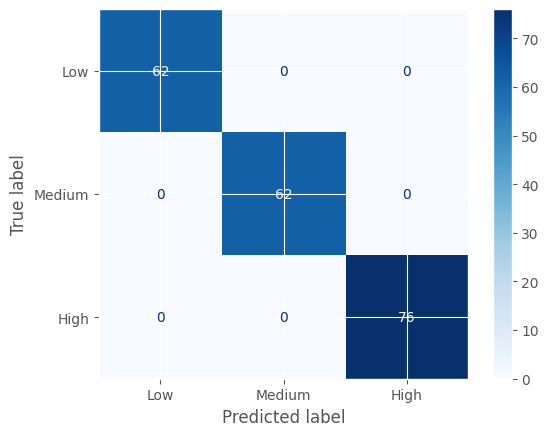

In [21]:
# Creación del modelo
model_dt = DecisionTreeClassifier()

# Entrenamiento del modelo
model_dt.fit(x_train, y_train)

# Predicción y evaluación del modelo
y_pred_dt = model_dt.predict(x_test)
measure_perform(y_pred_dt)

# Identificar qué características tienen más influencia en la predicción del modelo
importances_dt = model_dt.feature_importances_
print(importances_dt)

In [22]:
# Obtener los índices ordenados de las importancias de las características
indices = np.argsort(importances_dt)[::-1]

# Ordenar los nombres de las características según las importancias
features_name = ['air_pollution','alcohol_use','dust_allergy','occupational_hazards','genetic_risk','chronic_lung_disease','balanced_diet','obesity','smoking','passive_smoker','chest_pain','coughing_of_blood']
sorted_feature_names = [features_name[i] for i in indices]

# Imprimir las importancias de las características
for name, importance in zip(sorted_feature_names, importances_dt[indices]):
    print(f'{name}: {importance}')

passive_smoker: 0.37639269286381843
coughing_of_blood: 0.21517969881479354
obesity: 0.17859927556715044
dust_allergy: 0.14109131939876685
chronic_lung_disease: 0.06235706471971822
balanced_diet: 0.02637994863575242
chest_pain: 0.0
smoking: 0.0
genetic_risk: 0.0
occupational_hazards: 0.0
alcohol_use: 0.0
air_pollution: 0.0


### **Random Forest**
Los bosques aleatorios son una técnica de aprendizaje automático que combina múltiples árboles de decisión para obtener una mayor precisión y reducir el sobreajuste. Construyen múltiples árboles de decisión independientes utilizando diferentes subconjuntos aleatorios de datos de entrenamiento y características.

El proceso de combinación de múltiples árboles reduce la variabilidad y mejora la precisión general del modelo. Los bosques aleatorios son robustos, eficientes y se utilizan comúnmente para problemas de clasificación y regresión en conjuntos de datos grandes y complejos.

En primer lugar habría que crear el modelo para así poder entrenarlo. Al tener el modelo entrenado, se procedería a la predicción y a la evaluación del mismo.

Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0

 [[62  0  0]
 [ 0 62  0]
 [ 0  0 76]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************

[0.05665614 0.08626793 0.08063547 0.04444345 0.04551082 0.02416442
 0.05684536 0.17394505 0.04509769 0.12488475 0.07062801 0.19092091]


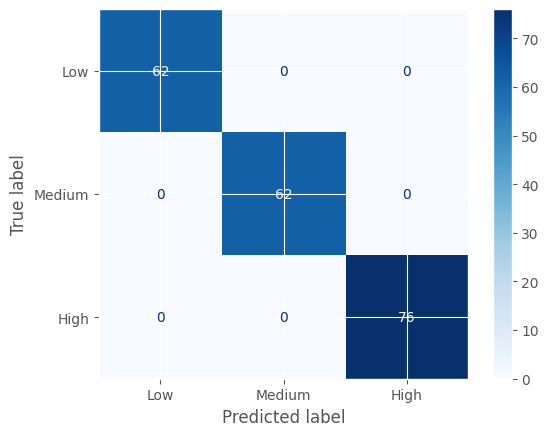

In [23]:
# Creación del modelo
model_rf = RandomForestClassifier()

# Entrenamiento del modelo
model_rf.fit(x_train, y_train)

# Predicción y evaluación del modelo
y_pred_rf = model_rf.predict(x_test)
measure_perform(y_pred_rf)

# Identificar qué características tienen más influencia en la predicción del modelo
importances_rf = model_rf.feature_importances_
print(importances_rf)

In [24]:
# Obtener los índices ordenados de las importancias de las características
indices = np.argsort(importances_rf)[::-1]

# Ordenar los nombres de las características según las importancias
features_name = ['air_pollution','alcohol_use','dust_allergy','occupational_hazards','genetic_risk','chronic_lung_disease','balanced_diet','obesity','smoking','passive_smoker','chest_pain','coughing_of_blood']
sorted_feature_names = [features_name[i] for i in indices]

# Imprimir las importancias de las características
for name, importance in zip(sorted_feature_names, importances_rf[indices]):
    print(f'{name}: {importance}')

coughing_of_blood: 0.19092090920345087
obesity: 0.17394505319573908
passive_smoker: 0.12488474660964356
alcohol_use: 0.08626793308215391
dust_allergy: 0.08063547002922872
chest_pain: 0.07062800545376523
balanced_diet: 0.05684536252496275
air_pollution: 0.056656138641596875
genetic_risk: 0.04551081645169176
smoking: 0.045097691795153945
occupational_hazards: 0.044443449930587985
chronic_lung_disease: 0.02416442308202538


### **Naive Bayes**
Naive Bayes es un algoritmo de aprendizaje supervisado utilizado principalmente para tareas de clasificación. Se basa en el teorema de Bayes y asume independencia condicional entre las características del conjunto de datos.

Precision:  0.755
Recall:  0.755
Accuracy:  0.755
F1 Score:  0.755

 [[57  3  2]
 [36 19  7]
 [ 0  1 75]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.61      0.92      0.74        62
           1       0.83      0.31      0.45        62
           2       0.89      0.99      0.94        76

    accuracy                           0.76       200
   macro avg       0.78      0.74      0.71       200
weighted avg       0.79      0.76      0.72       200

******************************************************

[ 0.024  0.047 -0.002  0.019 -0.003  0.042  0.093  0.054 -0.002 -0.006
  0.016  0.052]


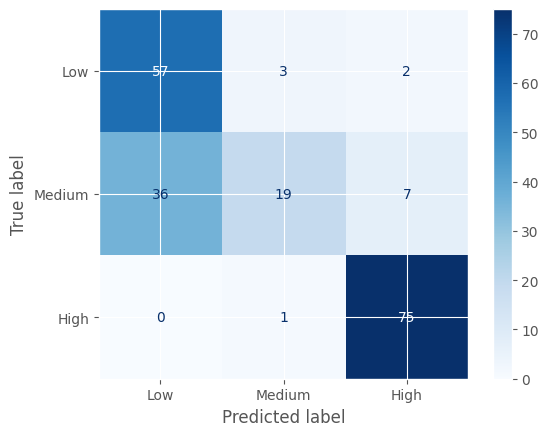

In [25]:
# Creación del modelo
model_nb = GaussianNB()

# Entrenamiento del modelo
model_nb.fit(x_train, y_train)

# Predicción y evaluación del modelo
y_pred_nb = model_nb.predict(x_test)
measure_perform(y_pred_nb)

# Identificar qué características tienen más influencia en la predicción del modelo
importances_nb = permutation_importance(model_nb, x_test, y_test)
print(importances_nb.importances_mean)

In [26]:
# Obtener los índices ordenados de las importancias
indices = importances_nb.importances_mean.argsort()[::-1]
features_name = ['air_pollution','alcohol_use','dust_allergy','occupational_hazards','genetic_risk','chronic_lung_disease','balanced_diet','obesity','smoking','passive_smoker','chest_pain','coughing_of_blood']

# Mostrar las importancias de características
print("Permutation Importance:")
for i in indices:
    print(f"{features_name[i]}: {importances_nb.importances_mean[i]} +/- {importances_nb.importances_std[i]}")

Permutation Importance:
balanced_diet: 0.09299999999999997 +/- 0.006782329983125274
obesity: 0.054000000000000006 +/- 0.021540659228537987
coughing_of_blood: 0.052000000000000046 +/- 0.00509901951359279
alcohol_use: 0.04700000000000002 +/- 0.015684387141358096
chronic_lung_disease: 0.04200000000000004 +/- 0.011661903789690611
air_pollution: 0.02400000000000002 +/- 0.01019803902718558
occupational_hazards: 0.019000000000000017 +/- 0.01067707825203132
chest_pain: 0.016000000000000014 +/- 0.014966629547095779
smoking: -0.0020000000000000018 +/- 0.007483314773547889
dust_allergy: -0.0020000000000000018 +/- 0.007483314773547889
genetic_risk: -0.0030000000000000027 +/- 0.017204650534085267
passive_smoker: -0.006000000000000005 +/- 0.0037416573867739447


## 5. Implementación de algoritmos de interpretabilidad




### 5.1. Local Interpretable Model-agnostic Explanations (LIME)
Se trata de un algoritmo diseñado para proporcionar interpretaciones locales de las predicciones hechas por modelos de aprendizaje automático, especialmente aquellos que son difíciles de interpretar ("blackbox"). LIME se centra principalmente en proporcionar interpretaciones locales, es decir, explicaciones sobre la predicción de un modelo para una instancia específica en lugar de intentar explicar el comportamiento global del modelo.

Tras haber dividido el conjunto de datos y haber aplicado varios algoritmos de aprendizaje automático (Decission Trees, Random Forest y Naive Bayes), se crea un explicador haciendo uso del algoritmo LIME explicado anteriormente.

In [27]:
# Crear un explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train,
    feature_names=prepared_data.columns.values.tolist(),
    class_names=df['level'].unique().tolist(),
    mode='classification'
)

# Seleccionar de una instancia para explicar
instance = x_test[0]

Tras haber implementado un explicador de LIME con el modo de `classification` ya que el objetivo principal de este proyecto es predecir una clase categórica, como "Low", "Medium" o "High".
Por tanto, se aplica el explicador de LIME para los tres algoritmos que se han implementado anteriormente: Decision Trees, Random Forest y Naive Bayes.

#### 5.1.1. Explicador para Decision Trees

In [28]:
# Generar la explicación para Decision Trees
exp_dt = explainer.explain_instance(
    data_row=instance,
    predict_fn=model_dt.predict_proba
)

# Muestra la explicación
exp_dt.show_in_notebook(show_table=True, show_all=False)

# Descargar la explicación en formato PNG
exp_dt.save_to_file('/content/drive/MyDrive/Colab Notebooks/explicacion_lime_dt.png')

#### 5.1.2. Explicador para Random Forest

In [29]:
# Generar la explicación para Random Forest
exp_rf = explainer.explain_instance(
    data_row=instance,
    predict_fn=model_rf.predict_proba
)

# Muestra la explicación
exp_rf.show_in_notebook(show_table=True, show_all=False)

# Descargar la explicación en formato PNG
exp_rf.save_to_file('/content/drive/MyDrive/Colab Notebooks/explicacion_lime_rf.png')

#### 5.1.3. Explicador para Naive Bayes

In [30]:
# Generar la explicación para Naive Bayes
exp_nb = explainer.explain_instance(
    data_row=instance,
    predict_fn=model_nb.predict_proba
)

# Muestra la explicación
exp_nb.show_in_notebook(show_table=True, show_all=False)

### 5.2 SHapley Additive exPlanations (SHAP)
El algoritmo SHAP es una herramienta poderosa para explicar las predicciones de modelos de aprendizaje automático, ya sean modelos de regresión, clasificación u otros tipos. Utiliza una formulación teórica sólida basada en la teoría de juegos y los valores de Shapley, que originalmente se utilizaban para distribuir de manera justa el pago entre jugadores en juegos cooperativos. SHAP proporciona explicaciones locales y globales para las predicciones de un modelo.

#### 5.2.1. Explicador para Decision Trees

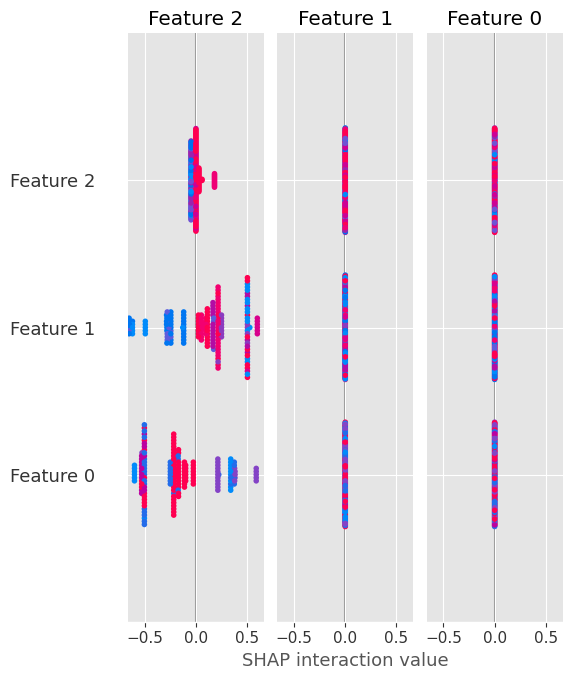

In [31]:
# Crear un objeto explainer con los datos de entrenamiento y el modelo entrenado, en este caso Decision Tree
explainer_dt = shap.Explainer(model_dt, x_train)

# Calcular los valores SHAP para el conjunto de datos de prueba
shap_values_dt = explainer_dt(x_test)

# Resumen de las contribuciones de cada característica a las predicciones
shap.summary_plot(shap_values_dt, x_test)

#### 5.2.3. Explicador para Random Forest

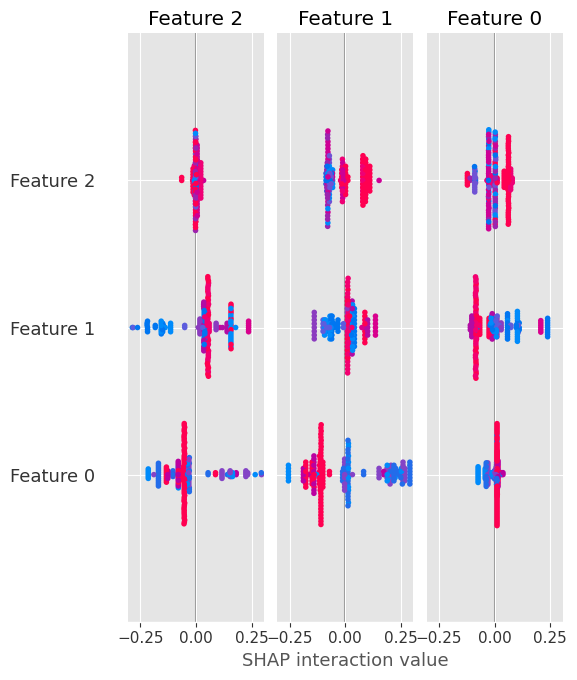

In [32]:
# Crear un objeto explainer con los datos de entrenamiento y el modelo entrenado, en este caso Random Forest
explainer_rf = shap.Explainer(model_rf, x_train)

# Calcular los valores SHAP para el conjunto de datos de prueba
shap_values_rf = explainer_rf(x_test)

# Resumen de las contribuciones de cada característica a las predicciones
shap.summary_plot(shap_values_rf, x_test)

#### 5.2.3. Explicador para Naive Bayes
Naive Bayes no se ajusta directamente al enfoque de SHAP debido a su naturaleza probabilística y la forma en que se calculan las probabilidades condicionales. En lugar de SHAP, para Naive Bayes, a menudo se utilizan métodos más simples como el análisis de importancia de características basado en probabilidades o análisis de sensibilidad de características.
